In [1]:
import random
import networkx
import matplotlib.pyplot as plt

## Rule

In [2]:
grammar = '''
sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮 | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着
noun2 = 桌子 | 皮球
'''

In [3]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern

In [4]:
grammar_pattern = build_grammar(grammar)

In [5]:
grammar_pattern

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']],
 'adj': [['adj_single', '和', 'adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [6]:
def generate(grammar_pattern, target):
    if target not in grammar_pattern: return target
    expr = random.choice(grammar_pattern[target])
    tokens = [generate(grammar_pattern, e) for e in expr]
    return ''.join([t for t in tokens if t != 'null'])

In [9]:
generate(grammar_pattern, 'sentence')

'女人静静地看着桌子'

## Search

In [10]:
graph = {
    'A' :'B B B C',
    'B' : 'A C',
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}

In [11]:
for k in graph:
    graph[k] = set(graph[k].split())

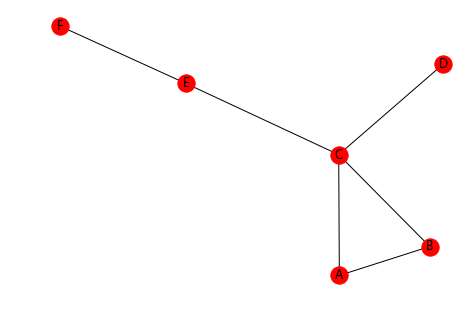

In [14]:
Graph = networkx.Graph(graph)
networkx.draw(Graph, with_labels=True)

In [15]:
seen = set()
need_visited = ['A']
while need_visited:
    node = need_visited.pop(0)
    if node in seen: continue
    print('   I am looking at : {}'.format(node))
    need_visited += graph[node]
    seen.add(node)

   I am looking at : A
   I am looking at : B
   I am looking at : C
   I am looking at : E
   I am looking at : D
   I am looking at : F


In [16]:
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}

In [17]:
for n in graph_long:
    graph_long[n] = graph_long[n].split()

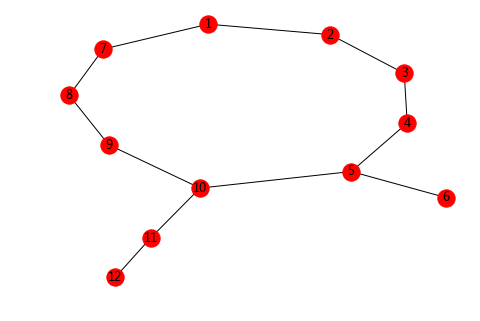

In [19]:
Graph_long = networkx.Graph(graph_long)
networkx.draw(Graph_long, with_labels=True)

In [20]:
seen = set()
need_visited = ['1']
while need_visited:
    node = need_visited.pop(0)
    if node in seen: continue
    print('   I am looking at : {}'.format(node))
    need_visited = graph_long[node] + need_visited
    seen.add(node)

   I am looking at : 1
   I am looking at : 2
   I am looking at : 3
   I am looking at : 4
   I am looking at : 5
   I am looking at : 6
   I am looking at : 10
   I am looking at : 11
   I am looking at : 12
   I am looking at : 7
   I am looking at : 8
   I am looking at : 9


In [21]:
def search(graph, concat_func):
    seen = set()
    need_visited = ['1']
    while need_visited:
        node = need_visited.pop(0)
        if node in seen: continue
        print(   'I am looking at : {}'.format(node))
        seen.add(node)
        new_discoveried = graph[node]
        need_visited = concat_func(new_discoveried, need_visited)

In [22]:
def treat_new_discoveried_more_important(new_discoveried, need_visited):
    return new_discoveried + need_visited

In [23]:
def treat_already_dicoveried_more_important(new_discoveried, need_visited):
    return need_visited + new_discoveried

In [24]:
from functools import partial

In [25]:
dfs = partial(search, concat_func=treat_new_discoveried_more_important)

In [26]:
dfs(graph_long)

I am looking at : 1
I am looking at : 2
I am looking at : 3
I am looking at : 4
I am looking at : 5
I am looking at : 6
I am looking at : 10
I am looking at : 11
I am looking at : 12
I am looking at : 7
I am looking at : 8
I am looking at : 9


In [27]:
bfs = partial(search, concat_func=treat_already_dicoveried_more_important)

In [28]:
bfs(graph_long)

I am looking at : 1
I am looking at : 2
I am looking at : 7
I am looking at : 3
I am looking at : 8
I am looking at : 4
I am looking at : 9
I am looking at : 5
I am looking at : 10
I am looking at : 6
I am looking at : 11
I am looking at : 12


In [29]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [30]:
air_route = {
    BJ: {SZ, GZ, WH, HLG, NY},
    GZ: {WH, BJ, CM},
    SZ: {BJ, SG},
    WH: {BJ, GZ},
    HLG: {BJ},
    CM: {GZ},
    NY: {BJ}
}

In [31]:
air_route = networkx.Graph(air_route)

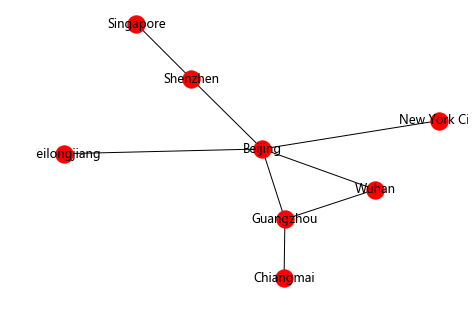

In [32]:
networkx.draw(air_route, with_labels=True)

In [33]:
def search_desitination(graph, start, desitination):
    pathes = [[start]]
    seen = set()
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        # get new city
        for city in graph[frontier]:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == desitination: return new_path
        seen.add(frontier)
    return chosen_pathes

In [34]:
def draw_route(cities): return ' ✈️ -> '.join(cities)

In [41]:
draw_route(search_desitination(air_route, NY, GZ))

'New York City ✈️ -> Beijing ✈️ -> Guangzhou'